Fast electrons - EELS mode dispersion
=========================================
*Example authors: A. Arbouet / P. R. Wiecha*  (*electron* submodule by A. Arbouet)

<span style="color: red;">**!!Attention!!**:</span> The *electron* module is still beta functionality and is to be used with caution. 


In this example, we reproduce the results of EELS mode dispersion from *Campos et al.* [1].


[1]: Campos et al.: *Plasmonic Breathing and Edge Modes in Aluminum Nanotriangles* **ACS Photonics** 4(5), 1257 (2017) (https://pubs.acs.org/doi/abs/10.1021/acsphotonics.7b00204)

structure initialization - automatic mesh detection: hex
structure initialization - consistency check: 1225/1225 dipoles valid


/home/hans/.local/lib/python3.8/site-packages/pyGDM2/visu.py:49: UserWarning: 3D data. Falling back to XY projection...
  warnings.warn("3D data. Falling back to XY projection...")


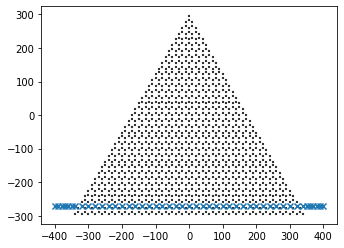

N dipoles: 1225


In [1]:
import matplotlib.pyplot as plt
import numpy as np

from pyGDM2 import structures
from pyGDM2 import materials
from pyGDM2 import fields
from pyGDM2 import core
from pyGDM2 import propagators
from pyGDM2 import electron
from pyGDM2 import tools
from pyGDM2 import visu

#****************************************************
#          SETTING PARAMETERS FOR ELECTRONS
#****************************************************
Eelec = 100.   # electron kinetic energy (keV)
kSign = 1      # Electron propagation direction


#****************************************************
#         nanostructure
#****************************************************
mesh = 'hex'
step = 20

## note: set H=3 for conditions in Campos et al. ACS Photonics 4(5), Pp.1257 (2017)
geometry = structures.prism(step, NSIDE=35, H=2, mesh=mesh, ORIENTATION=1) 
geometry = structures.center_struct(geometry)
material = materials.alu()

struct = structures.struct(step, geometry, material)


#****************************************************
#         incident field: 1D rasterscan
#****************************************************
field_generator = fields.fast_electron
energy = np.linspace(0.5, 4, 21)   # linear energy scale
wavelengths = 1239.0 / energy      # eV --> nm

## --- Generate positions for raster-scan, aligned with structure mesh
r_probe_1d = np.array([np.linspace(-400,400,81), -270*np.ones(81), 0*np.ones(81)]).T
r_probe_1d = tools.adapt_map_to_structure_mesh(r_probe_1d, geometry, 
                                               occupy_all_geo_positions=True)

kwargs_ebeam_1d = []
for x,y in r_probe_1d[:2].T:
   kwargs_ebeam_1d.append(dict(kSign=kSign, electron_kinetic_energy=Eelec,
                               x0=x, y0=y))

efield_1d_scan = fields.efield(field_generator, wavelengths=wavelengths, 
                               kwargs=kwargs_ebeam_1d)


#****************************************************
#         environment (--> used Green's tensors)
#****************************************************
n3 = 1.0  # cladding layer
n2 = 1.0  # environment
n1 = 2.0  # substrate environment
spacing = 10000.

dyads = propagators.DyadsQuasistatic123(n1, n2, n3, spacing=spacing)


#****************************************************
#         simulation init
#****************************************************
sim_1Dscan = core.simulation(struct=struct, efield=efield_1d_scan, dyads=dyads)


plt.subplot(111, aspect='equal')
visu.structure(sim_1Dscan, scale=0.5, show=0)
plt.scatter(r_probe_1d[0],r_probe_1d[1], marker='x')
plt.show()
print("N dipoles:", len(sim_1Dscan.struct.geometry))


run the simulation
--------------------------------

Now we run the simulation, calculating EELS spectra at the two indicated positions

In [2]:
## run the simulation
sim_1Dscan.scatter()

/home/hans/.local/lib/python3.8/site-packages/numba/core/dispatcher.py:237: UserWarning: Numba extension module 'numba_scipy' failed to load due to 'ValueError(No function '__pyx_fuse_0pdtr' found in __pyx_capi__ of 'scipy.special.cython_special')'.
  entrypoints.init_all()


timing for wl=2478.00nm - setup: EE 5320.3ms, inv.: 1229.6ms, repropa.: 2799.5ms (47 field configs), tot: 9349.7ms
timing for wl=1835.56nm - setup: EE 2553.2ms, inv.: 1490.7ms, repropa.: 2327.0ms (47 field configs), tot: 6372.4ms
timing for wl=1457.65nm - setup: EE 2554.8ms, inv.: 1368.8ms, repropa.: 2071.7ms (47 field configs), tot: 5996.0ms
timing for wl=1208.78nm - setup: EE 2540.2ms, inv.: 1294.6ms, repropa.: 2068.6ms (47 field configs), tot: 5904.1ms
timing for wl=1032.50nm - setup: EE 2566.5ms, inv.: 1291.6ms, repropa.: 2068.6ms (47 field configs), tot: 5927.7ms
timing for wl=901.09nm - setup: EE 2560.1ms, inv.: 1245.1ms, repropa.: 2027.3ms (47 field configs), tot: 5833.1ms
timing for wl=799.35nm - setup: EE 2567.3ms, inv.: 1172.1ms, repropa.: 1999.7ms (47 field configs), tot: 5739.7ms
timing for wl=718.26nm - setup: EE 2546.6ms, inv.: 1172.8ms, repropa.: 2027.8ms (47 field configs), tot: 5748.2ms
timing for wl=652.11nm - setup: EE 2568.0ms, inv.: 1167.3ms, repropa.: 2006.2ms (47

1

Calculate and plot the mode dispersion
--------------------------------

Comparison with the reference gives a very good agreement

calc EELS at wavelength 2478.0nm
calc EELS at wavelength 1835.6nm
calc EELS at wavelength 1457.6nm
calc EELS at wavelength 1208.8nm
calc EELS at wavelength 1032.5nm
calc EELS at wavelength 901.1nm
calc EELS at wavelength 799.4nm
calc EELS at wavelength 718.3nm
calc EELS at wavelength 652.1nm
calc EELS at wavelength 597.1nm
calc EELS at wavelength 550.7nm
calc EELS at wavelength 510.9nm
calc EELS at wavelength 476.5nm
calc EELS at wavelength 446.5nm
calc EELS at wavelength 420.0nm
calc EELS at wavelength 396.5nm
calc EELS at wavelength 375.5nm
calc EELS at wavelength 356.5nm
calc EELS at wavelength 339.5nm
calc EELS at wavelength 323.9nm
calc EELS at wavelength 309.8nm


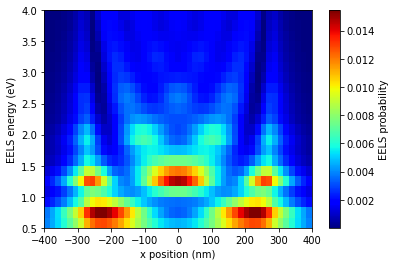

In [3]:
#%% ---- calc. EELS dispersion
EELS_dispersion = []
for i, wl in enumerate(wavelengths):
    print('calc EELS at wavelength {:.1f}nm'.format(wl))
    map_pos, EELS_scan = tools.calculate_rasterscan(sim_1Dscan, i, electron.EELS, 
                                                    key_x_pos='x0', key_y_pos='y0')
    EELS_dispersion.append(EELS_scan)


#%% ---- plot dispersion
ext = [map_pos.T[0].min(), map_pos.T[0].max(), energy.min(), energy.max()]

plt.subplot()
plt.xlabel("x position (nm)")
plt.ylabel("EELS energy (eV)")
im = plt.imshow(EELS_dispersion, extent=ext, aspect='auto', cmap='jet')
plt.colorbar(im, label="EELS probability")

plt.show()